In [ ]:
# @author: asmita chatterjee


#  dataset source :https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/
 
#  About the data  set :
#      Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

# The company wants to automate the loan eligibility process (real time) based on customer detail
#  provided while filling online application form. 
#  These details are:
#   Gender, 
#  Marital Status, 
#  Education,
#  Number of Dependents,
#  Income, 
#  Loan Amount,
#  Credit History 
# and
#  others.
#  To automate this process, they have given a problem to identify the customers segments,
#  those are eligible for loan amount 
# so that they can specifically target these customers. Here they have provided a partial data set.

# This is classification process to classify the loan status as Yes or No , based on varous features .

# tecnique used for classification: Random forest 

# This case study consists of the following steps :
    
#     1)  importing packags and reading the train and test data sets from files
#     2) Preprocessing and feature engineering 
#     3) Applying Random forest model after cross valdidation
#     4) evaluation  

In [1]:
###########import packages 
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, KFold

from sklearn.metrics import recall_score, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score, roc_auc_score, \
                            classification_report, confusion_matrix


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
###Read data

train = pd.read_csv('C:/Users/USER/Documents/datasets/final_data/Loan_pred/train.csv')
test = pd.read_csv('C:/Users/USER/Documents/datasets/final_data/Loan_pred/test.csv')

# Train file will be used for training the model, i.e. our model will learn from this file.
#  It contains all the independent variables and the target variable. 
#  Test file contains all the independent variables,
# but not the target variable. We will apply the model to predict the target variable for the test data

# Last but not the least , we will submit the predictions in 
# Sample submission file.csv 

In [4]:
## Checking the columns 
train.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
#checking missing values in each column of train dataset

train.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
test.isnull().sum()


Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [10]:
# First let us  look at the  target variable that is loan status .

# As it is a categorical variable , let us look into th frequency table , percentage distribution 
# and bar plot 

train['Loan_Status'].value_counts()


Y    422
N    192
Name: Loan_Status, dtype: int64

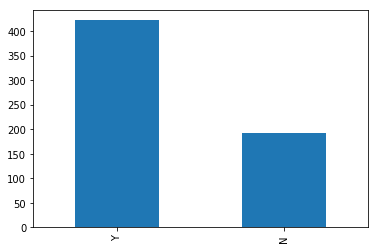

In [11]:
train['Loan_Status'].value_counts().plot.bar()


In [12]:
### Missing value imputation

# There are 3 types of variables:
     
#  -->Categorical: ( if any of these below mentioned variables are not turned to binary numercial , then we will use
#                          numerical encoding to do so)
#      Gender,
#      Married,
#      Self_Employed,
#      Credit_History,
#      Loan_Status)
 
#  --->Ordinal features: Variables in categorical features having some order involved :
#  (Dependents-- this is an ordinal variable , since having more number of dependents, reduces a loan eligibility  
#  Education----a more educated person has higher probabiity of getting a loan 
#  Property_Area---a person from a developed region , has a better loan eligbility 
 
#  ---> Numerical : 
#        ApplicantIncome,
#        CoapplicantIncome,
#        LoanAmount,
#        Loan_Amount_Term 
  
# ----    Amongst the numeric variables :
           
#     ApplicantIncome,
#        CoapplicantIncome,
#        LoanAmount,
#        Loan_Amount_Term 
       
#        the missing variables are :
#            LoanAmount and Loan_Amount_Term
       
#         First carrying out the missing value imputation of these 2 variables:
       
    
#  Based on the area of property   and the appplicant income , the loan amount will vary 
#         Since loan amount is a numeric variable , so we will replace the term with median 

train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [13]:
# Since test  data set also has missing values for LoanAmount , so we will use the same strategy  for test data set

test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

In [15]:
###Loan_Amount_Term- Finding out the counts of the various values of the Loan amount term 
   
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [18]:
# "so we can see  value 360 is  used in 512 records.hence it is the mode value 
#  Hence we will use this  mode value  as a missing value substitute:

train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True) 
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)

In [20]:
#  For categorical variables: imputation using mode
# There are very less missing values 
#  Gender, Married, Dependents, Credit_History and Self_Employed features 
#  so we can fill them using the mode of the features. 


## For Gender 
 
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)


### For Married ## 
 
train['Married'].fillna("No",inplace=True)

##train["Dependents"].isnull().sum()##15#############


## for dependents , wherever , missing , replace with 0
train['Dependents'].fillna(0, inplace=True)
test['Dependents'].fillna(0, inplace=True)


## For Self_Employed### For null values , replace with a No
## we are assuming that if the value is NUll , the concerned applicant is not self applicant 

train['Self_Employed'].fillna("No", inplace=True)
test['Self_Employed'].fillna("No", inplace=True)


### For Credit_History### Fill 0 whereevr empty

### replace the credit history with 0 value , whrever the history  s NULL
### we are assuming that in case of NUll value , th concerned applicant  has a bad credit history 

train['Credit_History'].fillna(0, inplace=True)
test['Credit_History'].fillna(0, inplace=True)

## a bit more replacement option

train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)

In [21]:
##### add the  applicant income as well as the co applicant income 

train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

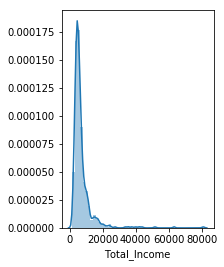

In [22]:
### Lets look into  the distribution of Total_Income variable.
plt.figure(10)
plt.subplot(121)
sns.distplot(train['Total_Income']);

In [23]:

train['Total_Income'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Total_Income, dtype: float64

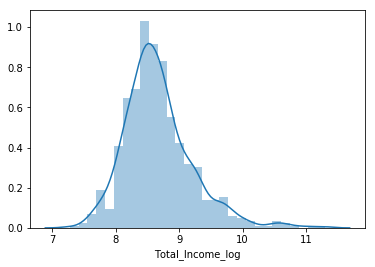

In [24]:
### Hence from the mean and the description , it is evident , the distribution if rightly skewed 
## so we will apply log transformation in the total income 

train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);

## we can see that the distribution is normal now 
test['Total_Income_log'] = np.log(test['Total_Income'])

In [25]:
#### Categorical
## Change categorical variables Gender to numeric categorical

train['Gender'] = train['Gender'].map( {'Male': 0, 'Female': 1} )
test['Gender'] = test['Gender'].map( {'Male': 0, 'Female': 1} )



### Change categorical variable Married to numeric categorical
train['Married'] = train['Married'].map( {'No': 0, 'Yes': 1} )
test['Married'] = test['Married'].map( {'No': 0, 'Yes': 1} )

###Change categorical variable Education to numeric categorical
train['Education'] = train['Education'].map( {'Not Graduate': 0, 'Graduate': 1} )
test['Education'] = test['Education'].map( {'Not Graduate': 0, 'Graduate': 1} )

###Change categorical variable Self Employed to numeric categorical
train['Self_Employed'] = train['Self_Employed'].map( {'No': 0, 'Yes': 1} )
test['Self_Employed'] = test['Self_Employed'].map( {'No': 0, 'Yes': 1} )


###Change categorical variable Property_Area to numeric categorical

train['Property_Area'] = train['Property_Area'].map( {'Rural': 1, 'Semiurban': 2,'Urban': 3} )
test['Property_Area'] = test['Property_Area'].map( {'Rural': 1, 'Semiurban': 2 ,'Urban': 3} )


In [26]:
###Change categorical variable Loan_status  to numeric categorical

train['Loan_Status'] = train['Loan_Status'].map( {'N': 0, 'Y': 1} )

In [27]:
## Take the Loanid in a variable 
Loan_ID = test['Loan_ID']

In [28]:
## next drop the redundant variables

train=train.drop(['ApplicantIncome', 'CoapplicantIncome','Total_Income','Loan_ID'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome','Total_Income','Loan_ID'], axis=1)


In [29]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree, model_selection
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier()


In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval 
###of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)),'criterion':['gini','entropy'], 'n_estimators': list(range(1, 200, 20))}


grid_classifier = model_selection.GridSearchCV(classifier, paramgrid, cv=10, scoring='accuracy',refit=True, 
                                              n_jobs=-1, return_train_score=True)


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

In [34]:

grid_classifier.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'criterion': ['gini', 'entropy'], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [35]:
### get the best estimator 
final_model = grid_classifier.best_estimator_
print(final_model)

### So, the optimized value for the max_depth variable is 7
##and for n_estimator is 61 and criterion : entropy Now let’s build the model using these optimized values.

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=61, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [37]:
from sklearn.model_selection import StratifiedKFold



In [38]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = RandomForestClassifier(random_state=1, max_depth=7, n_estimators=61,criterion ='entropy')
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1


1 of kfold 5
accuracy_score 0.7580645161290323

2 of kfold 5
accuracy_score 0.7338709677419355

3 of kfold 5
accuracy_score 0.7377049180327869

4 of kfold 5
accuracy_score 0.7540983606557377

5 of kfold 5
accuracy_score 0.7950819672131147


In [39]:
## The meam validation accuracy  turns out to be : 0.755746

pred_test = model.predict(test)


In [40]:
pred=model.predict_proba(test)[:,1]

In [41]:
## converting the data set to test data set 

submission = pd.DataFrame({
        "Loan_ID": Loan_ID,### from the assigned variable 
        "Loan_Status": pred_test
    })

##submission['Loan_Status']=pred_test            # filling Loan_Status with predictions
###submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Random Forest.csv')


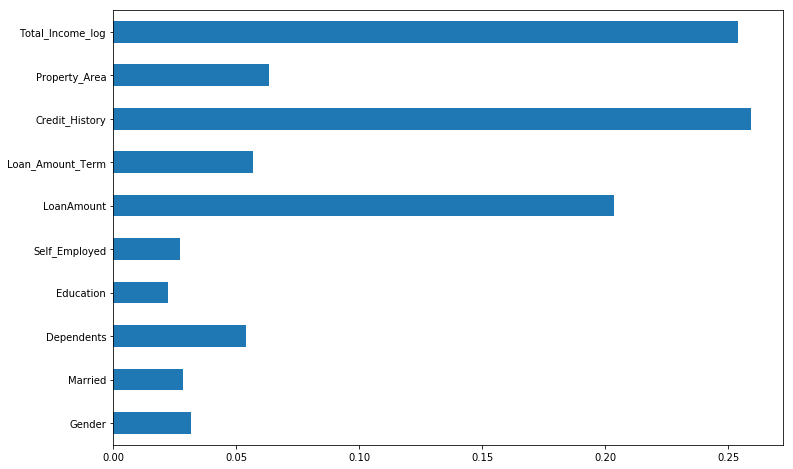

In [42]:
## let us find out the feature importance now

importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

In [ ]:
# hence it is evident  Credt history and Total income  are  the most important feature 
# Least is Education 